In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [39]:
import os
from keras.utils.np_utils import to_categorical 
import numpy as np
import cv2 
from tqdm.notebook import tqdm
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten, Dropout
from keras.layers import AveragePooling2D
from keras.models import Model
from keras.layers import Input
import tensorflow as tf
from keras.utils import plot_model

In [83]:
#defining path of location where all 3 sets are stored
Path_aircrafts = '/content/gdrive/My Drive/Dataset2/aircrafts/'
Path_ships = '/content/gdrive/My Drive/Dataset2/ships/'
Path_none = '/content/gdrive/My Drive/Dataset2/none/'

In [84]:
#looking at names of images and number of images
dirs_aircrafts = os.listdir(Path_aircrafts)
dirs_ships = os.listdir(Path_ships)
dirs_none = os.listdir(Path_none)
print(dirs_aircrafts)
k = np.array(dirs_aircrafts)
print(k.shape)

print(dirs_ships)
l = np.array(dirs_ships)
print(l.shape)

print(dirs_none)
m = np.array(dirs_none)
print(m.shape)

['54.png', '377.png', '80.png', '478.png', '477.png', '99.png', '208.png', '379.png', '132.png', '500.png', '195.png', '180.png', '261.png', '319.png', '33.png', '289.png', '85.png', '455.png', '484.png', '392.png', '291.png', '419.png', '206.png', '408.png', '153.png', '464.png', '287.png', '323.png', '431.png', '388.png', '399.png', '436.png', '124.png', '351.png', '3.png', '74.png', '182.png', '78.png', '41.png', '53.png', '82.png', '116.png', '19.png', '308.png', '23.png', '304.png', '397.png', '58.png', '66.png', '273.png', '142.png', '309.png', '102.png', '178.png', '149.png', '460.png', '108.png', '106.png', '461.png', '4.png', '439.png', '433.png', '154.png', '209.png', '470.png', '86.png', '168.png', '411.png', '222.png', '235.png', '371.png', '276.png', '249.png', '199.png', '272.png', '83.png', '387.png', '105.png', '239.png', '44.png', '400.png', '60.png', '27.png', '101.png', '311.png', '314.png', '12.png', '402.png', '163.png', '346.png', '498.png', '307.png', '434.png', 

In [85]:

#Checking size of 2 different images and showing the images too
path1 = '/content/gdrive/My Drive/Dataset2/aircrafts/54.png'
img1 = cv2.imread(path1,1)
print(img1.shape) 
cv2_imshow(img1)

path2 = '/content/gdrive/My Drive/Dataset2/aircrafts/442.png'
img2 = cv2.imread(path2,1) 
print(img2.shape)
cv2_imshow(img2)


(20, 20, 3)


(20, 20, 3)


In [86]:
Path_aircrafts = '/content/gdrive/My Drive/Dataset2/aircrafts/'
Path_ships = '/content/gdrive/My Drive/Dataset2/ships/'
Path_none = '/content/gdrive/My Drive/Dataset2/none/'
X = np.empty((1500, 20, 20, 3),float)

In [87]:
Y = [ ]
for i in tqdm(range(500)):
  img = cv2.imread(Path_aircrafts+'/'+dirs_aircrafts[i] )
  img = np.resize(img,(20,20,3))
  X[i] = img
  Y.append(0)
for i in tqdm(range(500)):
  img = cv2.imread(Path_ships+'/'+dirs_ships[i] )
  img = np.resize(img,(20,20,3))
  X[i+500] = img
  Y.append(1)
for i in tqdm(range(500)):
  img = cv2.imread(Path_none+'/'+dirs_none[i] )
  img = np.resize(img,(20,20,3))
  X[i+1000] = img
  Y.append(2)

     
y = to_categorical(Y, num_classes=3)
print(y.shape)
print(X.shape) 


(1500, 3)
(1500, 20, 20, 3)


In [88]:
#Code to take imput X,y,i and output image and label.
def check(X,y,i):
  print (y[i])
  img = X[i]
  cv2_imshow(img)

check(X,y,1000)
check(X,y,999)

[0. 0. 1.]


[0. 1. 0.]


In [27]:
path2save = '/content/gdrive/My Drive/save_npy_files/'
np.save(path2save+'Dataset2.npy', X )
np.save(path2save+'Dataset2_label.npy', y )

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8,test_size=0.2,shuffle = True)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 20, 20, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 20, 20, 64)   9472        input_8[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_19 (MaxPooling2D) (None, 10, 10, 64)   0           conv2d_94[0][0]                  
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 10, 10, 64)   36928       max_pooling2d_19[0][0]           
_______________________________________________________________________________________

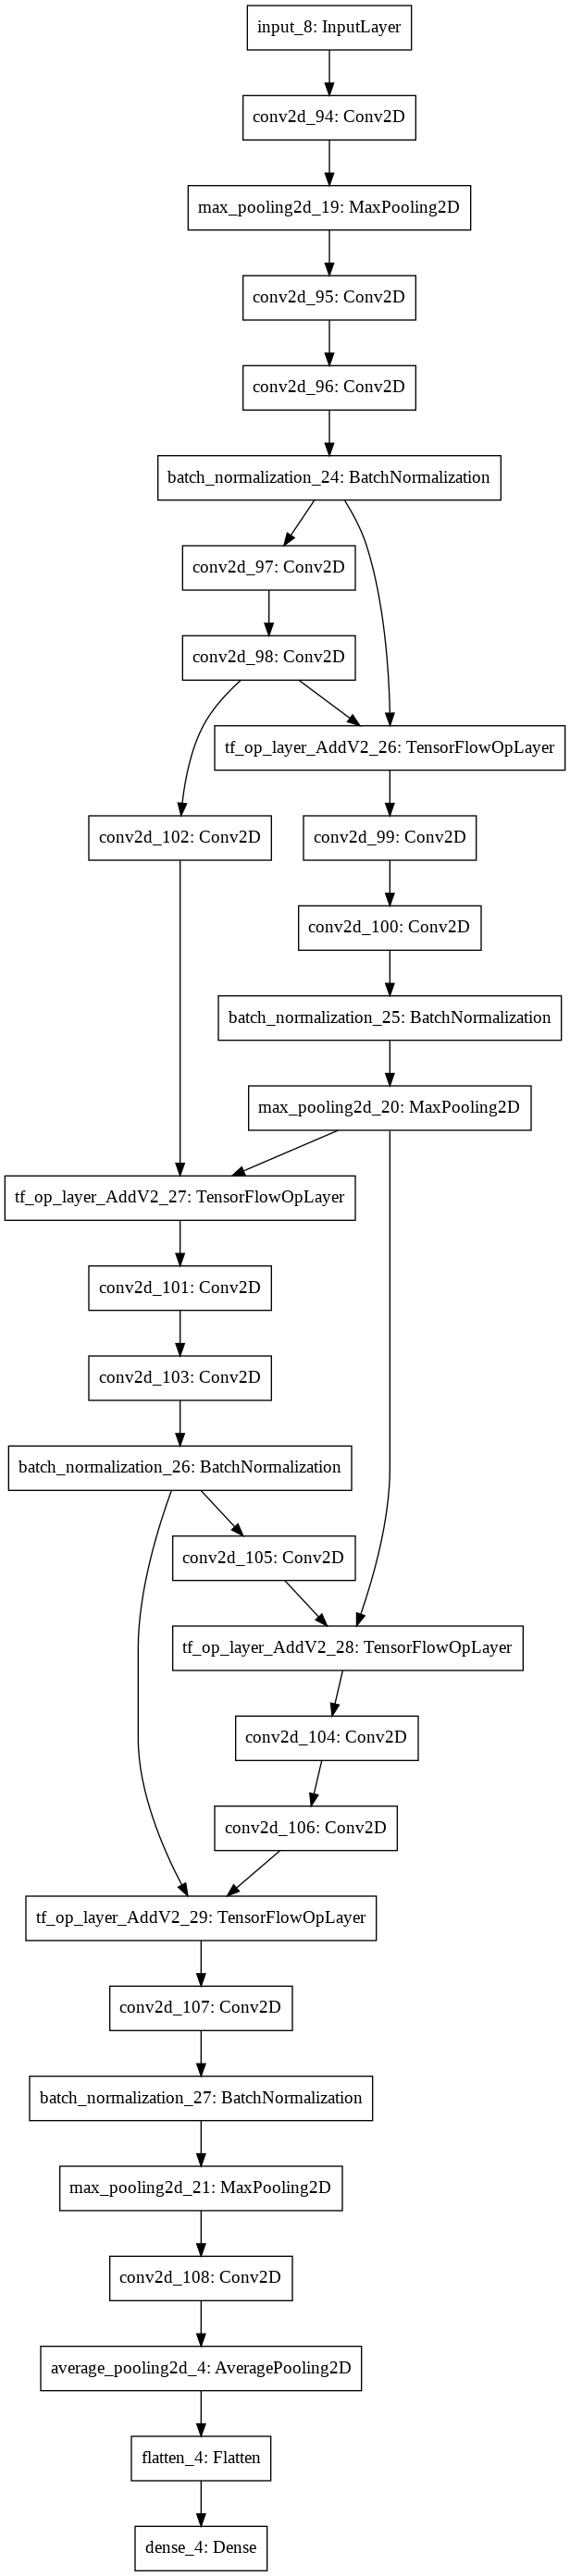

In [90]:
#Resnet using Keras
inputs = Input(shape =(20,20,3))

conv1 = Conv2D(64, kernel_size=7,padding= 'same', activation='relu')(inputs)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1) 

conv2 = Conv2D(64, kernel_size=3,padding= 'same', activation='relu')(pool1)
conv3 = Conv2D(64, kernel_size=3,padding= 'same', activation='relu')(conv2) #has shape (128,128,64)
bn1 = tf.keras.layers.BatchNormalization(axis = -1)(conv3)


conv6 = Conv2D(64, kernel_size=3,padding= 'same', activation='relu')(bn1) #Residual addition
conv7 = Conv2D(64, kernel_size=3,padding= 'same', activation='relu')(conv6) #has shape (128,128,64)

conv8 = Conv2D(64, kernel_size=3,padding= 'same', activation='relu')(conv7 + bn1) #Residual addition
conv9 = Conv2D(64, kernel_size=3,padding= 'same', activation='relu')(conv8) #has shape (128,128,64)
bn2 = tf.keras.layers.BatchNormalization(axis = -1)(conv9)

pool2 = MaxPooling2D(pool_size = (2,2), strides = 2)(bn2) #has shape (64,64,64)

conv10 = Conv2D(128, kernel_size=3,padding= 'same', activation='relu')(pool2 + Conv2D(64, kernel_size=1, strides = 2, activation='linear')(conv7)) #Residual addition
conv11 = Conv2D(128, kernel_size=3,padding= 'same', activation='relu')(conv10) #has shape (64,64,128)
bn3 = tf.keras.layers.BatchNormalization(axis = -1)(conv11)

conv12 = Conv2D(128, kernel_size=3,padding= 'same', activation='relu')(Conv2D(64, kernel_size=1,padding= 'same', activation='linear')(bn3)+ pool2) #Residual addition
conv13 = Conv2D(128, kernel_size=3,padding= 'same', activation='relu')(conv12)

conv16 = Conv2D(128, kernel_size=3,padding= 'same', activation='relu')(conv13 + bn3) #Residual addition
bn4 = tf.keras.layers.BatchNormalization(axis = -1)(conv16)

pool4 = MaxPooling2D(pool_size = (2,2), strides = 2)(bn4)

conv31 = Conv2D(512, kernel_size=3,padding= 'same', activation='relu')(pool4)


pool5 = AveragePooling2D(pool_size=(2,2))(conv31)

flat = Flatten()(pool5)
output = Dense(3, activation = 'softmax')(flat)


model = Model(inputs, outputs=output)
print(model.summary())
plot_model(model)

In [91]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1200, 20, 20, 3)
(300, 20, 20, 3)
(1200, 3)
(300, 3)


In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x = X_train, y=Y_train, epochs = 5)

Epoch 1/5
38/38 [==============================] - 10s 274ms/step - loss: 0.6771 - accuracy: 0.7175
Epoch 2/5
38/38 [==============================] - 10s 275ms/step - loss: 0.5281 - accuracy: 0.7758
Epoch 3/5
38/38 [==============================] - 11s 277ms/step - loss: 0.4541 - accuracy: 0.8033
Epoch 4/5
38/38 [==============================] - 11s 277ms/step - loss: 0.4843 - accuracy: 0.7933
Epoch 5/5
27/38 [====================>.........] - ETA: 3s - loss: 0.5466 - accuracy: 0.7731